In [1]:
from load_data import generate_pair_sets
from Visualization import plot_pairs, plot_single
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
train_data, train_target, train_classes, test_data, test_target, test_classes = generate_pair_sets(50)

In [3]:
print(
    train_data.shape,
    train_classes.shape,
    train_target.shape
)
print(
    test_data.shape,
    test_classes.shape,
    test_target.shape
)

torch.Size([50, 2, 14, 14]) torch.Size([50, 2, 10]) torch.Size([50, 2])
torch.Size([50, 2, 14, 14]) torch.Size([50, 2, 10]) torch.Size([50, 2])


larger is 0; smaller or equal is 1

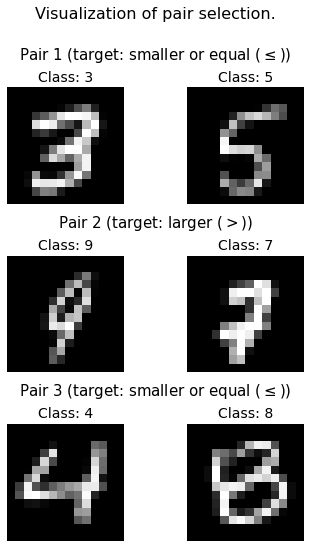

In [4]:
plot_pairs(3, train_data, train_classes, train_target)

Sanity check for concatenating the tensors before feeding them to Conv2d layers.

In [6]:
model = nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3), 
        nn.MaxPool2d(2, stride = 2),
        nn.Conv2d(32, 32, kernel_size=3))

output = model(train_data[:, 0, :, :].unsqueeze(1))
output2 = model(train_data[:, 0, :, :].unsqueeze(1))
output = torch.cat((output, output2), 1)
print(output.shape, nn.Conv2d(32, 32, kernel_size=3).weight.size(0))
model = nn.Sequential(nn.Conv2d(64, 64, kernel_size=4))
ouput = model(output)
print(ouput.shape)

torch.Size([50, 64, 4, 4]) 32
torch.Size([50, 64, 1, 1])


In [ ]:
a = [1., 2., 3.]
b = [1., 2., 3.]
l = []

l.append(a)
l.append(b)
print(l)
print(torch.tensor(l))

torch.mean(torch.tensor(l), 0)

[[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]]
tensor([[1., 2., 3.],
        [1., 2., 3.]])


tensor([1., 2., 3.])